<a href="https://colab.research.google.com/github/IqbalLx/Data-Bangalore-Image-Processing/blob/main/computer_vision_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
print(tf.__version__)

2.8.0


## Utils

In [4]:
def visualize_metrics(hist):
  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(hist.epoch, hist.history['loss'], label='Loss')
  plt.plot(hist.epoch, hist.history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(hist.epoch, hist.history['accuracy'], label='Acc')
  plt.plot(hist.epoch, hist.history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [5]:
def visualize_learning_rate(hist):
  plt.figure(figsize=(12, 5))

  plt.plot(hist.epoch, hist.history['lr'], label='Learning Rate')
  plt.legend()

  return plt.show()

# What is Neural Network?

In general, neural network trying to mimic human brain behaviour, which is able to learn. let's see how the learning works

In [ ]:
def simple_func(x):
  noise = np.random.normal(0,1,1)[0]
  return 2 * x - 1 + noise

In [ ]:
X = np.random.randint(low=1, high=10, size=1000)
y = np.array([simple_func(x) for x in X], dtype="float32")

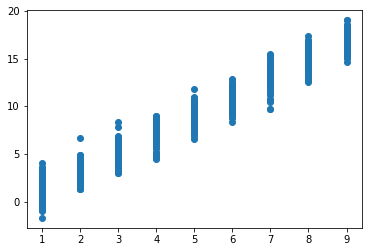

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer="sgd", loss='mean_squared_error')

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_14/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.54446423]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
# initial guessing
model.predict([10.0])

array([[-5.444642]], dtype=float32)

In [ ]:
model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6353
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1893
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1282
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0884
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0588
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0271
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0081
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9963
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9882
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9622
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9756
Epoch 13/100
32/32 [=================

In [ ]:
model.predict([10.0])

array([[18.875494]], dtype=float32)

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_14/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9754308]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([-0.8788151], dtype=float32)>]

# Intro Computer Vision

In [ ]:
mnist = tf.keras.datasets.mnist

learn more at: https://tensorflow.org/datasets

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
training_images.shape

(60000, 28, 28)

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

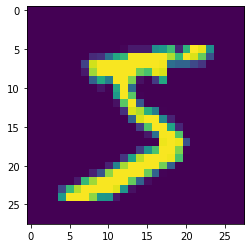

In [ ]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0511 - val_accuracy: 0.9854


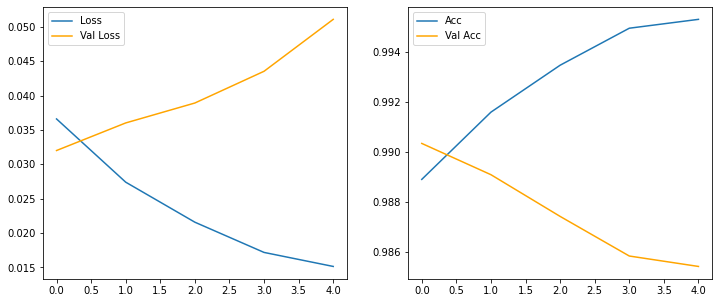

In [ ]:
visualize_metrics(hist)

7


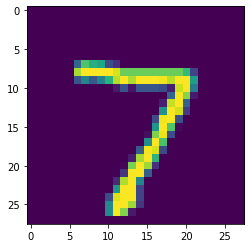

In [ ]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [ ]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

[[4.2680707e-12 1.5815278e-11 4.0977959e-09 4.7244331e-08 2.1156610e-14
  1.4668753e-12 1.3365578e-20 1.0000000e+00 1.7880232e-10 6.6727774e-09]]


In [ ]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 7 with confidency 100.00%


## Let's upgrade our data a little bit more complex

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(training_images.shape)

(60000, 28, 28)


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

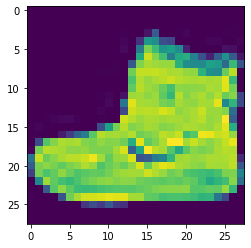

In [ ]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

quoting from original homepage, [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation="relu"), 
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dense_30 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5230 - accuracy: 0.8183 - val_loss: 0.4207 - val_accuracy: 0.8510
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3896 - accuracy: 0.8597 - val_loss: 0.3783 - val_accuracy: 0.8648
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3518 - accuracy: 0.8704 - val_loss: 0.3694 - val_accuracy: 0.8622
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3233 - accuracy: 0.8818 - val_loss: 0.3771 - val_accuracy: 0.8654
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8881 - val_loss: 0.3551 - val_accuracy: 0.8745


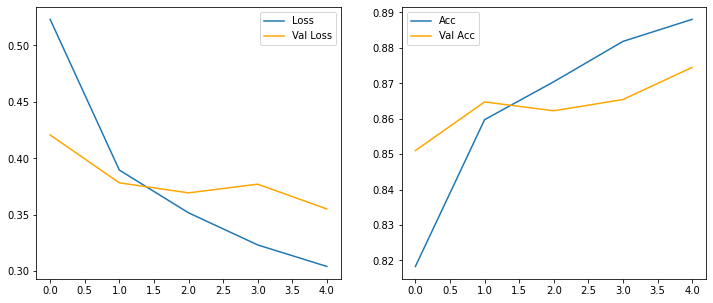

In [ ]:
visualize_metrics(hist)

9


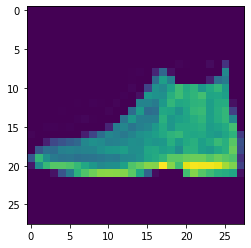

In [ ]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [ ]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

[[2.3354396e-06 5.1041753e-09 1.2806640e-06 2.2977654e-08 3.2114499e-06
  3.7946105e-03 1.5835934e-05 1.6256758e-03 1.6578231e-05 9.9454039e-01]]


In [ ]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 99.45%


In [ ]:
hist2 = model.fit(training_images, training_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5191 - accuracy: 0.8193 - val_loss: 0.4017 - val_accuracy: 0.8568
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3837 - accuracy: 0.8619 - val_loss: 0.3885 - val_accuracy: 0.8613
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3422 - accuracy: 0.8751 - val_loss: 0.3710 - val_accuracy: 0.8681
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3180 - accuracy: 0.8829 - val_loss: 0.3336 - val_accuracy: 0.8825
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2970 - accuracy: 0.8920 - val_loss: 0.3222 - val_accuracy: 0.8840
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2851 - accuracy: 0.8953 - val_loss: 0.3252 - val_accuracy: 0.8834
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2734 - accuracy: 0.8977 - val_loss: 0.3222 - val_ac

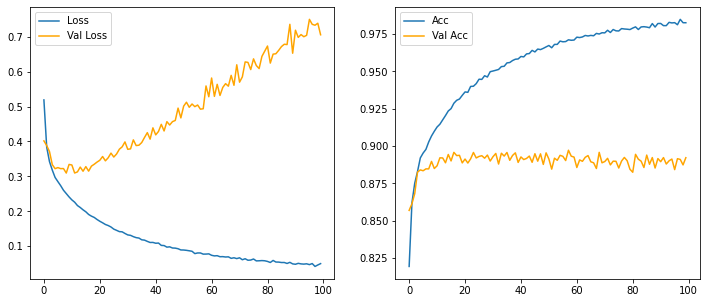

In [ ]:
visualize_metrics(hist2)

This is the perfect example of overfitting. Our model become so good in predicting training data, but worse when predicting data that it's never seen before

## Improvising Computer Vision with CNN

In [ ]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
hist = cnn_model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 21s 9ms/step - loss: 0.4682 - accuracy: 0.8286 - val_loss: 0.3457 - val_accuracy: 0.8748
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3106 - accuracy: 0.8847 - val_loss: 0.2959 - val_accuracy: 0.8929
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2636 - accuracy: 0.9025 - val_loss: 0.2716 - val_accuracy: 0.8997
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2290 - accuracy: 0.9154 - val_loss: 0.2556 - val_accuracy: 0.9056
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1996 - accuracy: 0.9254 - val_loss: 0.2704 - val_accuracy: 0.9070


it's even reach accuracy on 90% just after 4 epochs

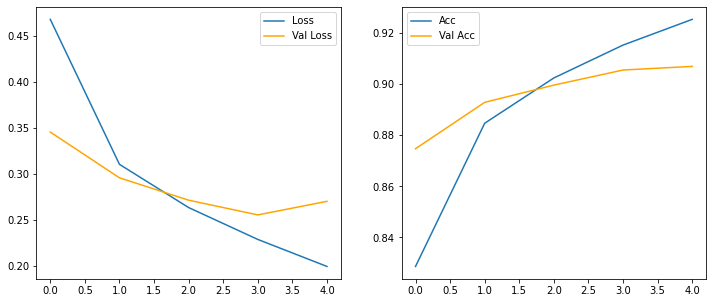

In [ ]:
visualize_metrics(hist)

In [ ]:
hist2 = cnn_model.fit(training_images, training_labels, batch_size=64, validation_split=0.2, epochs=100)

Epoch 1/100
750/750 [==============================] - 9s 10ms/step - loss: 0.7746 - accuracy: 0.8091 - val_loss: 0.3800 - val_accuracy: 0.8621
Epoch 2/100
750/750 [==============================] - 7s 10ms/step - loss: 0.3446 - accuracy: 0.8741 - val_loss: 0.3238 - val_accuracy: 0.8836
Epoch 3/100
750/750 [==============================] - 7s 10ms/step - loss: 0.2933 - accuracy: 0.8912 - val_loss: 0.3292 - val_accuracy: 0.8827
Epoch 4/100
750/750 [==============================] - 7s 9ms/step - loss: 0.2658 - accuracy: 0.8998 - val_loss: 0.2924 - val_accuracy: 0.8927
Epoch 5/100
750/750 [==============================] - 7s 10ms/step - loss: 0.2446 - accuracy: 0.9064 - val_loss: 0.3190 - val_accuracy: 0.8867
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.2295 - accuracy: 0.9138 - val_loss: 0.3135 - val_accuracy: 0.8886
Epoch 7/100
750/750 [==============================] - 7s 9ms/step - loss: 0.2155 - accuracy: 0.9194 - val_loss: 0.3014 - val_accuracy: 0

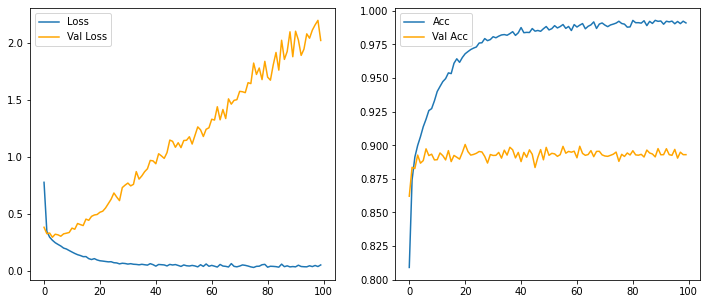

In [ ]:
visualize_metrics(hist2)

At some epoch val_accuracy did reach 90% but over all it's still suffer from overfitting, let's see what we can do

## Defining Callbacks

In [ ]:
# early stop custom callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
cnn_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 11, 11, 64)      

In [ ]:
hist4 = cnn_model_2.fit(
    training_images, 
    training_labels, 
    batch_size=64, 
    validation_split=0.2, 
    epochs=100,
    callbacks=[myCallback()]
)

Epoch 1/100
750/750 [==============================] - 12s 14ms/step - loss: 0.6003 - accuracy: 0.7876 - val_loss: 0.4166 - val_accuracy: 0.8515
Epoch 2/100
750/750 [==============================] - 10s 13ms/step - loss: 0.4190 - accuracy: 0.8474 - val_loss: 0.4075 - val_accuracy: 0.8496
Epoch 3/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3732 - accuracy: 0.8638 - val_loss: 0.3436 - val_accuracy: 0.8738
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3434 - accuracy: 0.8738 - val_loss: 0.3297 - val_accuracy: 0.8799
Epoch 5/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3260 - accuracy: 0.8811 - val_loss: 0.3151 - val_accuracy: 0.8837
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3119 - accuracy: 0.8847 - val_loss: 0.3020 - val_accuracy: 0.8882
Epoch 7/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3012 - accuracy: 0.8891 - val_loss: 0.3309 - val_accu

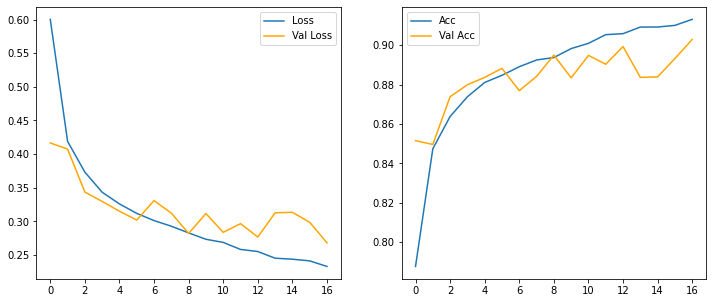

In [ ]:
visualize_metrics(hist4)

## More Callbacks

In [ ]:
cnn_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_3.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 11, 11, 64)      

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=10, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [ ]:
hist5 = cnn_model_3.fit(
    training_images, 
    training_labels, 
    batch_size=64, 
    validation_split=0.2, 
    epochs=100,
    callbacks=[early_stop, reduce_lr_on_plateau]
)

Epoch 1/100
750/750 [==============================] - 11s 13ms/step - loss: 0.5676 - accuracy: 0.7964 - val_loss: 0.4477 - val_accuracy: 0.8401 - lr: 0.0100
Epoch 2/100
750/750 [==============================] - 9s 12ms/step - loss: 0.4218 - accuracy: 0.8455 - val_loss: 0.5576 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 3/100
750/750 [==============================] - 9s 13ms/step - loss: 0.3842 - accuracy: 0.8591 - val_loss: 0.4247 - val_accuracy: 0.8453 - lr: 0.0100
Epoch 4/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3634 - accuracy: 0.8659 - val_loss: 0.3898 - val_accuracy: 0.8565 - lr: 0.0100
Epoch 5/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3468 - accuracy: 0.8727 - val_loss: 0.3772 - val_accuracy: 0.8636 - lr: 0.0100
Epoch 6/100
750/750 [==============================] - 10s 13ms/step - loss: 0.3405 - accuracy: 0.8751 - val_loss: 0.3314 - val_accuracy: 0.8767 - lr: 0.0100
Epoch 7/100
750/750 [==============================] -

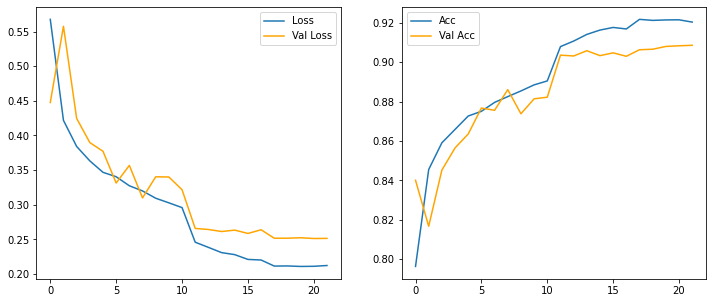

In [ ]:
visualize_metrics(hist5)

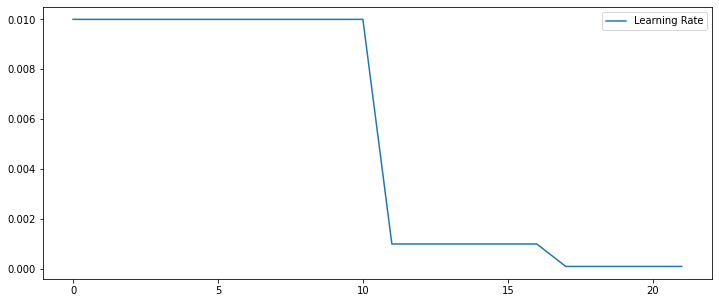

In [ ]:
visualize_learning_rate(hist5)

In [ ]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = cnn_model_3.predict(prepro_test_image)

print(out)

[[6.4331594e-08 3.8567070e-08 1.9119717e-07 9.9317873e-08 2.9737421e-08
  7.0859437e-06 1.4551675e-07 1.8613066e-03 1.7729548e-06 9.9812931e-01]]


In [ ]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 99.81%


In [ ]:
# saving the model
cnn_model_3.save("./cnn_model_3.h5")

## Inspecting inside the model

<Figure size 1440x864 with 0 Axes>

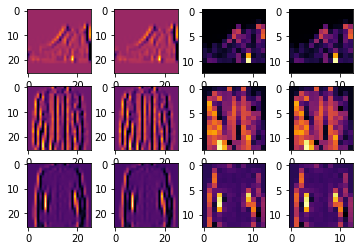

In [ ]:
plt.figure(figsize=(20, 12))
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in cnn_model_3.layers]
activation_model = tf.keras.models.Model(inputs = cnn_model_3.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Move on to Real World Data

Unfortunately real world images out there not simply consist of 28x28 grayscale images. Current commonly used resolution is 1280x720 at least, and can be up to 8K. How can we fit those images into our networks?

1. the images os not squared
2. the images are now RGB
3. the size of our images may not fitted or RAM

In [6]:
# get some more complex close to real world data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-03-19 05:59:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.147.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   213MB/s    in 0.7s    

2022-03-19 05:59:49 (213 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [13]:
!unzip -q /tmp/horse-or-human.zip -d /content/human-or-horse

In [14]:
# Directory with our training horse pictures
train_horse_dir = '/content/human-or-horse/horses'

# Directory with our training human pictures
train_human_dir = '/content/human-or-horse/humans'

In [15]:
import os

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))


total training horse images: 500
total training human images: 527


In [16]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse44-6.png', 'horse31-9.png', 'horse01-8.png', 'horse03-9.png', 'horse10-7.png', 'horse20-6.png', 'horse34-9.png', 'horse33-5.png', 'horse33-9.png', 'horse41-1.png']
['human09-07.png', 'human04-06.png', 'human09-12.png', 'human13-15.png', 'human16-28.png', 'human01-00.png', 'human03-09.png', 'human12-07.png', 'human05-24.png', 'human01-10.png']


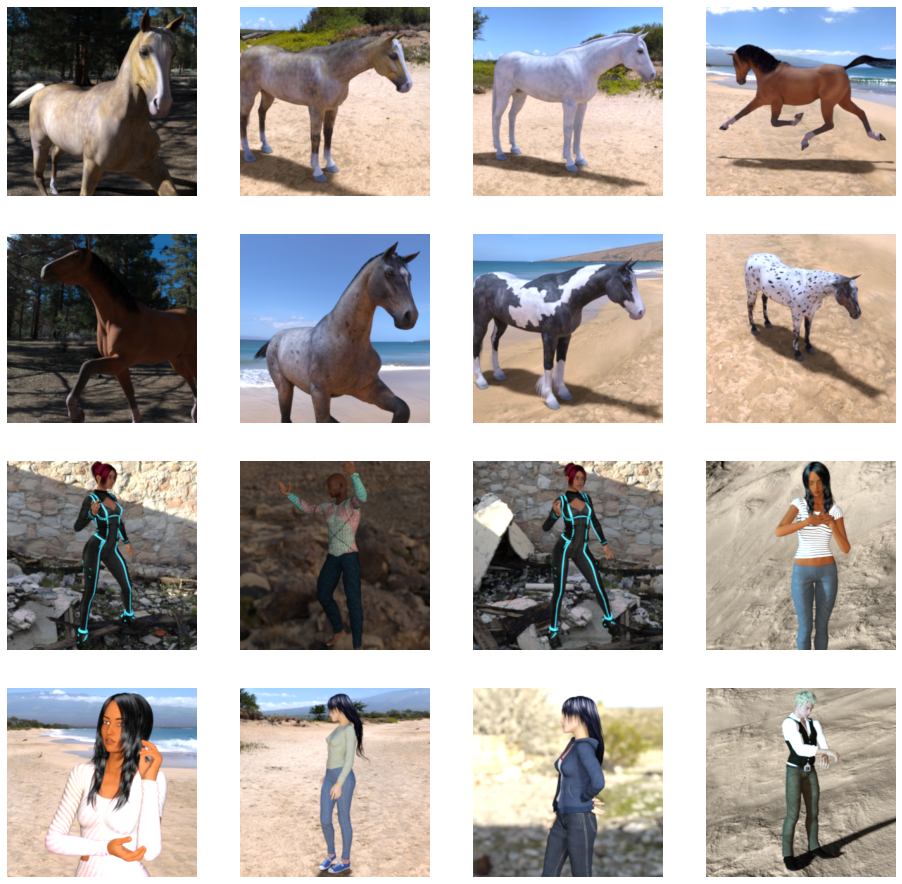

In [17]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Image Data Generator

this is Tensorflow features that let us do data pre-processing on-the-fly. Which means all data not necessarily load into the RAM all at once, it will batch our data, transform it and feed it into our neural network.

It is so much efficient in RAM than load all the images at once, also it save us disk storage because we didn't need additional folder that contains our transformed dataset.

In [21]:
TRAIN_BATCH_SIZE=64
VAL_BATCH_SIZE=8
TARGET_SIZE=150

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_datagen = datagen.flow_from_directory(
    "/content/human-or-horse",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    subset="training"
)

val_datagen = datagen.flow_from_directory(
    "/content/human-or-horse",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=VAL_BATCH_SIZE,
    subset="validation"
)

Found 925 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [31]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(TARGET_SIZE, TARGET_SIZE, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 32)      

In [33]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=10, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [34]:
hist = cnn_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    epochs=50,
    callbacks=[early_stop, reduce_lr_on_plateau]
)

14/14 [==============================] - 51s 468ms/step - loss: 0.8226 - accuracy: 0.7632 - val_loss: 1.8668 - val_accuracy: 0.4902 - lr: 0.0100
Epoch 2/50
14/14 [==============================] - 6s 442ms/step - loss: 0.3208 - accuracy: 0.8876 - val_loss: 1.5112 - val_accuracy: 0.5490 - lr: 0.0100
Epoch 3/50
14/14 [==============================] - 7s 450ms/step - loss: 0.2747 - accuracy: 0.8843 - val_loss: 1.8895 - val_accuracy: 0.6863 - lr: 0.0100
Epoch 4/50
14/14 [==============================] - 7s 453ms/step - loss: 0.2073 - accuracy: 0.9200 - val_loss: 2.2297 - val_accuracy: 0.6961 - lr: 0.0100
Epoch 5/50
14/14 [==============================] - 7s 453ms/step - loss: 0.1724 - accuracy: 0.9514 - val_loss: 0.8894 - val_accuracy: 0.6961 - lr: 0.0100
Epoch 6/50
14/14 [==============================] - 7s 448ms/step - loss: 0.1421 - accuracy: 0.9503 - val_loss: 1.0707 - val_accuracy: 0.5098 - lr: 0.0100
Epoch 7/50
14/14 [==============================] - 7s 501ms/step - loss: 0.1268

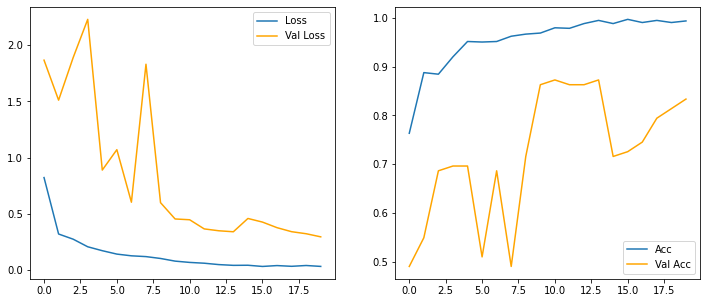

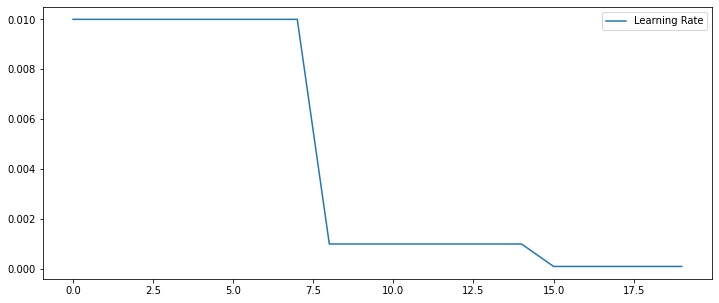

In [35]:
visualize_metrics(hist)
visualize_learning_rate(hist)

In [ ]:
import numpy as np
from keras.preprocessing import image

In [40]:
# predicting images
sample_path = "/content/human-or-horse/horses/horse31-3.png"
img = image.load_img(sample_path, target_size=(TARGET_SIZE, TARGET_SIZE))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

classes = cnn_model.predict(x, batch_size=1)
print(classes[0])

if classes[0]>0.5:
  print(sample_path + " is a human")
else:
  print(sample_path + " is a horse")
 


[0.46664405]
/content/human-or-horse/horses/horse31-3.png is a horse


## Now let's try with non syntecthic data

In [41]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2022-03-19 06:49:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 209.85.234.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   115MB/s    in 0.6s    

2022-03-19 06:49:41 (115 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [42]:
!unzip -q /tmp/cats_and_dogs_filtered -d /content/cat-or-dog

In [43]:
# Directory with our training cat pictures
train_cat_dir = '/content/cat-or-dog/cats_and_dogs_filtered/train/cats'

# Directory with our training dog pictures
train_dog_dir = '/content/cat-or-dog/cats_and_dogs_filtered/train/dogs'

In [44]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))

total training cat images: 1000
total training dog images: 1000


In [45]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

['cat.295.jpg', 'cat.19.jpg', 'cat.112.jpg', 'cat.497.jpg', 'cat.608.jpg', 'cat.155.jpg', 'cat.971.jpg', 'cat.671.jpg', 'cat.308.jpg', 'cat.968.jpg']
['dog.38.jpg', 'dog.454.jpg', 'dog.365.jpg', 'dog.287.jpg', 'dog.280.jpg', 'dog.886.jpg', 'dog.593.jpg', 'dog.81.jpg', 'dog.499.jpg', 'dog.438.jpg']


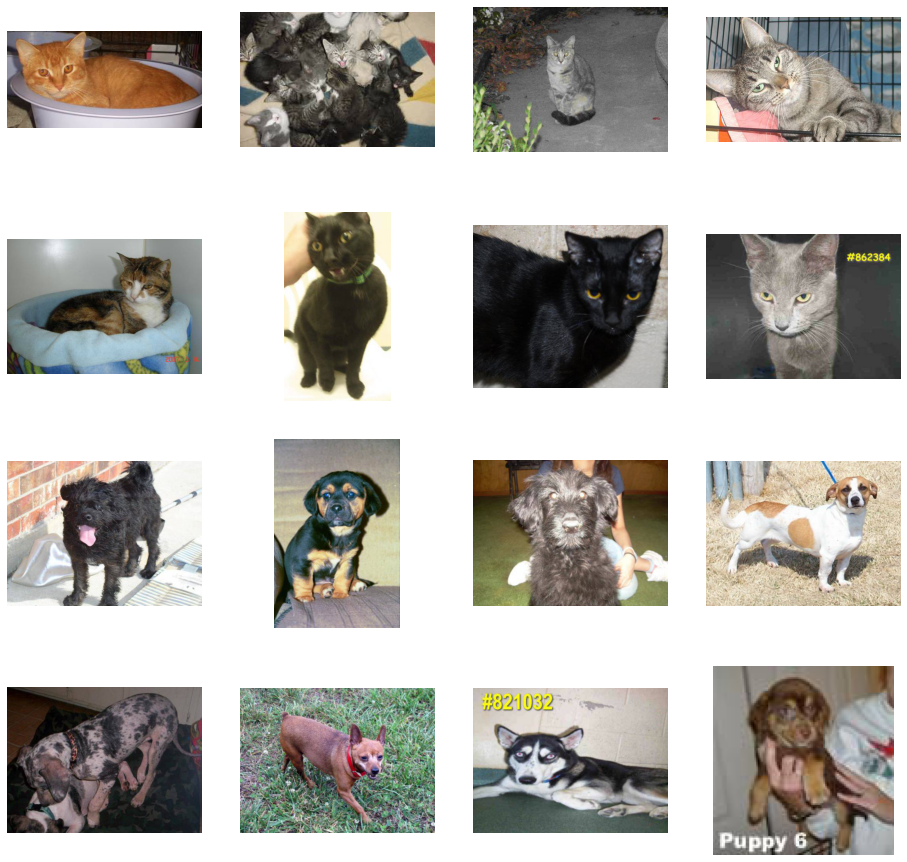

In [46]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [74]:
TRAIN_BATCH_SIZE=20
VAL_BATCH_SIZE=20
TARGET_SIZE=150

In [75]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

train_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/train",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=TRAIN_BATCH_SIZE
)

val_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/validation",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=VAL_BATCH_SIZE
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [82]:
simple_cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

simple_cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
simple_cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 17, 17, 128)    

In [83]:
hist = simple_cnn_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    validation_steps=val_datagen.n / VAL_BATCH_SIZE,
    epochs=30
)

Epoch 1/30
100/100 [==============================] - 14s 126ms/step - loss: 0.6910 - accuracy: 0.5265 - val_loss: 0.6783 - val_accuracy: 0.5690
Epoch 2/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6575 - accuracy: 0.6055 - val_loss: 0.6938 - val_accuracy: 0.5470
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6116 - accuracy: 0.6665 - val_loss: 0.6453 - val_accuracy: 0.6000
Epoch 4/30
100/100 [==============================] - 12s 122ms/step - loss: 0.5723 - accuracy: 0.7000 - val_loss: 0.6067 - val_accuracy: 0.6740
Epoch 5/30
100/100 [==============================] - 12s 124ms/step - loss: 0.5332 - accuracy: 0.7330 - val_loss: 0.5589 - val_accuracy: 0.7150
Epoch 6/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5041 - accuracy: 0.7525 - val_loss: 0.5539 - val_accuracy: 0.7210
Epoch 7/30
100/100 [==============================] - 12s 119ms/step - loss: 0.4703 - accuracy: 0.7845 - val_loss: 0.5531 - val_ac

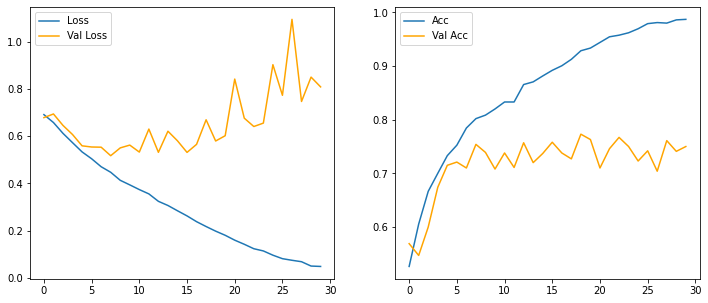

In [84]:
visualize_metrics(hist)

In [85]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/train",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=TRAIN_BATCH_SIZE
)

val_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/validation",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=VAL_BATCH_SIZE
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [86]:
simple_cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

simple_cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
simple_cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 17, 17, 128)    

In [87]:
hist2 = simple_cnn_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    validation_steps=val_datagen.n / VAL_BATCH_SIZE,
    epochs=30
)

Epoch 1/30
100/100 [==============================] - 28s 268ms/step - loss: 0.6927 - accuracy: 0.5220 - val_loss: 0.6879 - val_accuracy: 0.5570
Epoch 2/30
100/100 [==============================] - 27s 267ms/step - loss: 0.6843 - accuracy: 0.5655 - val_loss: 0.6623 - val_accuracy: 0.6350
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6667 - accuracy: 0.5870 - val_loss: 0.6484 - val_accuracy: 0.6340
Epoch 4/30
100/100 [==============================] - 27s 272ms/step - loss: 0.6505 - accuracy: 0.6260 - val_loss: 0.6371 - val_accuracy: 0.6440
Epoch 5/30
100/100 [==============================] - 27s 273ms/step - loss: 0.6428 - accuracy: 0.6255 - val_loss: 0.6501 - val_accuracy: 0.6160
Epoch 6/30
100/100 [==============================] - 27s 272ms/step - loss: 0.6222 - accuracy: 0.6495 - val_loss: 0.6694 - val_accuracy: 0.5950
Epoch 7/30
100/100 [==============================] - 27s 266ms/step - loss: 0.6169 - accuracy: 0.6625 - val_loss: 0.5900 - val_ac

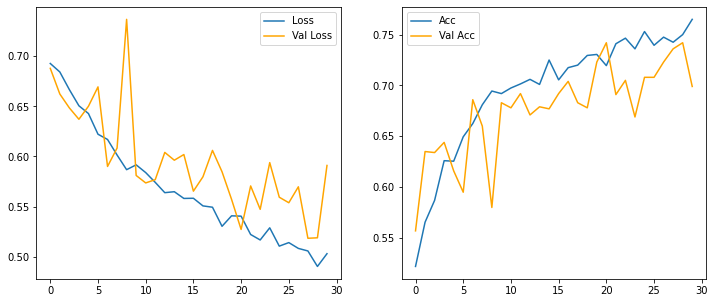

In [89]:
visualize_metrics(hist2)

# Transfer Learning

In [90]:
resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet'
)

94781440/94765736 [==============================] - 1s 0us/step


In [103]:
resnet.trainable = False
transfer_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  resnet,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

transfer_model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_12 (Flatten)        (None, 100352)            0         
                                                                 
 dense_28 (Dense)            (None, 1024)              102761472 
                                                                 
 dense_29 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 126,350,209
Trainable params: 102,762,497
Non-trainable params: 23,587,712
_________________________________________________________________


In [101]:
TRAIN_BATCH_SIZE=64
VAL_BATCH_SIZE=8
TARGET_SIZE=224

In [102]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/train",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=TRAIN_BATCH_SIZE
)

val_datagen = datagen.flow_from_directory(
    "/content/cat-or-dog/cats_and_dogs_filtered/validation",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=VAL_BATCH_SIZE
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [105]:
hist = transfer_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    validation_steps=val_datagen.n / VAL_BATCH_SIZE,
    epochs=10
)

Epoch 1/10
31/31 [==============================] - 51s 2s/step - loss: 0.8996 - accuracy: 0.5275 - val_loss: 1.0208 - val_accuracy: 0.5120
Epoch 2/10
31/31 [==============================] - 50s 2s/step - loss: 0.8443 - accuracy: 0.5570 - val_loss: 0.6530 - val_accuracy: 0.6270
Epoch 3/10
31/31 [==============================] - 50s 2s/step - loss: 0.9289 - accuracy: 0.5185 - val_loss: 1.3776 - val_accuracy: 0.5010
Epoch 4/10
31/31 [==============================] - 50s 2s/step - loss: 0.8450 - accuracy: 0.5580 - val_loss: 0.8851 - val_accuracy: 0.5310
Epoch 5/10
31/31 [==============================] - 50s 2s/step - loss: 0.9019 - accuracy: 0.5305 - val_loss: 0.7419 - val_accuracy: 0.5550
Epoch 6/10
31/31 [==============================] - 49s 2s/step - loss: 0.8632 - accuracy: 0.5630 - val_loss: 0.7816 - val_accuracy: 0.5210
Epoch 7/10
31/31 [==============================] - 50s 2s/step - loss: 0.9152 - accuracy: 0.5145 - val_loss: 0.6470 - val_accuracy: 0.6380
Epoch 8/10
31/31 [==

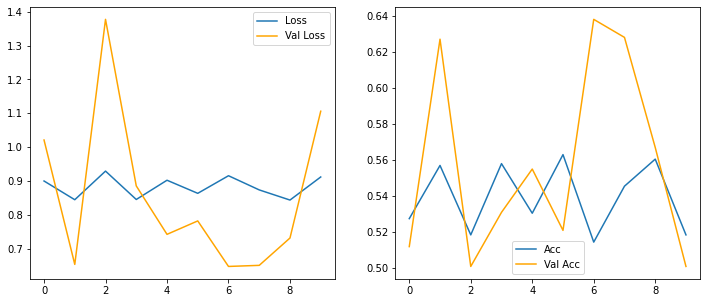

In [106]:
visualize_metrics(hist)